In [1]:
import numpy as np
import re
from matplotlib import pyplot as plt
%matplotlib inline
import random

In [2]:
f = open('input.txt', 'r')
ds = f.read()
f.close()

In [8]:
for ix in ds[:1000].split('\n'):
    ix = ix.strip()
    print ix






THE COMPLETE SHERLOCK HOLMES

Arthur Conan Doyle



Table of contents

A Study In Scarlet

The Sign of the Four

The Adventures of Sherlock Holmes
A Scandal in Bohemia
The Red-Headed League
A Case of Identity
The Boscombe Valley Mystery
The Five Orange Pips
The Man with the Twisted Lip
The Adventure of the Blue Carbuncle
The Adventure of the Speckled Band
The Adventure of the Engineer's Thumb
The Adventure of the Noble Bachelor
The Adventure of the Beryl Coronet
The Adventure of the Copper Beeches

The Memoirs of Sherlock Holmes
Silver Blaze
The Yellow Face
The Stock-Broker's Clerk
The "Gloria


In [10]:
# print ds.index('A STUDY IN SCARLET')
start = 3433
length = 50000

data = ' '.join([ix.strip() for ix in ds[start:start+length].split('\n')]).lower()


In [11]:
# print data
print len(data)

print len(set(data))

46100
46


In [89]:
T = {}

# define order of the Markov chain
order = 11

for ix in range(len(data)-order):
    # get the current context
    ctx = data[ix:ix+order]
    
    # get the future val
    future_val = data[ix+order]
    
    # check if the context exists
    if T.get(ctx) is None:
        T[ctx] = {}
        T[ctx][future_val] = 1
    else:
        # check if the future_val key exists
        if T[ctx].get(future_val) is None:
            T[ctx][future_val] = 1
        else:
            T[ctx][future_val] += 1

In [90]:
len(T.keys())

43599

In [91]:
for kx in T.keys():
    s = float(sum(T[kx].values()))
    
    for k in T[kx].keys():
        T[kx][k] = T[kx][k]/s

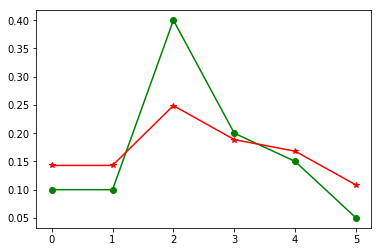

In [92]:
def temp_sample(probs, temp=1.0):
    probs = np.asarray(probs)
    exp_probs = np.exp(np.log(probs) / temp)
    
    return list(exp_probs / exp_probs.sum())

p = [0.1, 0.1, 0.4, 0.2, 0.15, 0.05]
q = temp_sample(p, 2.50)

plt.plot(p, 'go-')
plt.plot(q, 'r*-')

plt.show()

In [93]:
def generate_next(ctx, diversity=1.0):
    r = np.random.random()
    
    possible = T.get(ctx)
    
    if possible is None:
        return ' '
    diverse_probs = temp_sample(possible.values(), temp=diversity)
    return np.random.choice(possible.keys(), p=diverse_probs)

In [95]:
print generate_next("t", diversity=.5)

In [96]:
ind = int(np.random.random()*(len(data)-order))
initial_state = 'afghanistan'
#data[ind:ind+order]
ctx = initial_state

sentence = '' + ctx

for ix in range(2000):
    nxt = generate_next(ctx, diversity=1)
    sentence += nxt
    ctx = sentence[-order:]

print sentence

afghanistan, i perceive."  "how on earth did you know that?" i asked in astonishment.  a short passage, bare planked and dusty, led to the kitchen and offices. two doors opened out of it to the left and to the right. one of these he has a large square room, looking all the larger from the absence of all furniture. a vulgar flaring paper adorned the walls, but it was blotched in places with mildew, and here and there a "to let" card had developed like a cataract upon the bleared panes. a small garden sprinkled over with a scattered about, which bristled with retorts, test-tubes, and little bunsen lamps, with their blue flickering flames. there was anything against him?"  "oh, i didn't say there was one little sallow rat-faced, dark-eyed fellow who was introduced to me as mr. lestrade, is here. i had relied upon him to look after this."  holmes glanced at me and raised his hand in a salute, and was gone.      chapter iii the lauriston gardens wore an ill-omened and minatory look. it was 